In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<h1>First let's see how the data in general is laid out and what the data looks like</h1>

In [2]:
df = pd.read_csv("main_apple.csv")
df.head()

,name,size,price,rating_count_tot,rating,content_rating,category
0,PAC-MAN Premium,100788224,3.99,21292,4.0,4+,Games
1,Evernote - stay organized,158578688,0.00,161065,4.0,4+,Productivity
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,3.5,4+,Weather
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,262241,4.0,12+,Shopping
4,Bible,92774400,0.00,985920,4.5,4+,Reference


In [3]:
df.describe()

,size,price,rating_count_tot,rating
count,7.197000e+03,7197.000000,7.197000e+03,7197.000000
mean,1.991345e+08,1.726218,1.289291e+04,3.526956
std,3.592069e+08,5.833006,7.573941e+04,1.517948
min,5.898240e+05,0.000000,0.000000e+00,0.000000
25%,4.692275e+07,0.000000,2.800000e+01,3.500000
50%,9.715302e+07,0.000000,3.000000e+02,4.000000
75%,1.819249e+08,1.990000,2.793000e+03,4.500000
max,4.025970e+09,299.990000,2.974676e+06,5.000000


<h3>Now, let's see how the apps are distributed with category and price</h3>

In [4]:
free_categ = df[df['price'] == 0]['category']
paid_categ = df[df['price']>0]['category']
categ = df['category']

paid_categ = paid_categ.value_counts().to_dict()
free_categ = free_categ.value_counts().to_dict()
categ = categ.value_counts().to_dict()

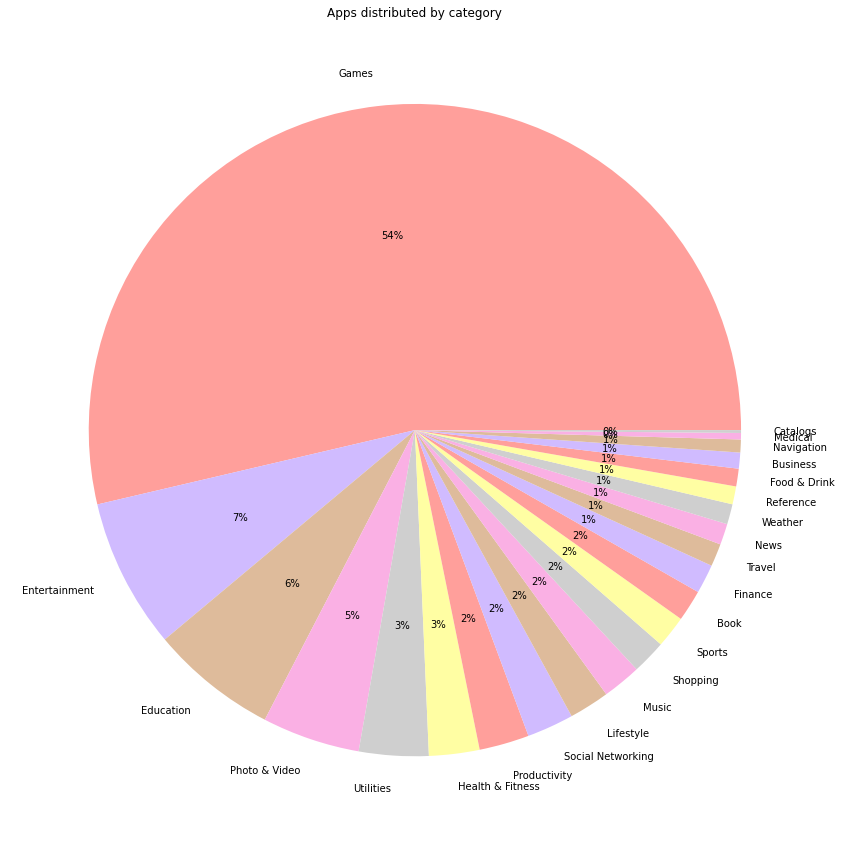

In [5]:
colors = sns.color_palette('pastel')[3:9]
plt.rcParams["figure.figsize"] = (15,15)
plt.pie(list(categ.values()), labels = list(categ.keys()), colors = colors, autopct='%.0f%%')
plt.title("Apps distributed by category")
plt.show()

<h3>Now, let's see how the apps are distributed with price</h3>

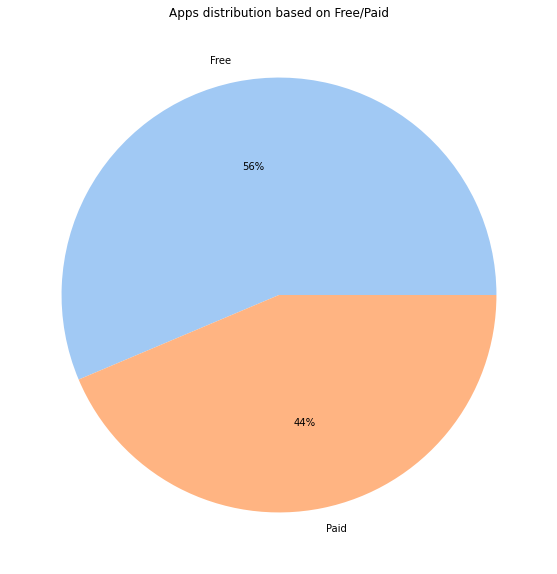

In [6]:
price_of_apps = [df[df['price'] == 0].shape[0]]
price_of_apps.append(df.shape[0] - price_of_apps[0])

labels = ['Free', 'Paid']

colors = sns.color_palette('pastel')[0:5]
plt.rcParams["figure.figsize"] = (10,10)
plt.pie(price_of_apps, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Apps distribution based on Free/Paid")
plt.show()

<p><b>Okay we can see that about 44% of the applications on the app store are paid and the rest are free</b></p>

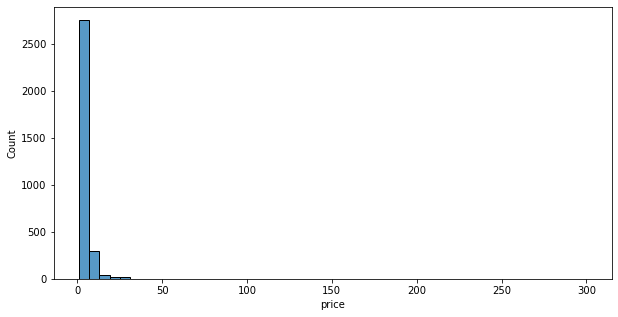

In [7]:
price_categ = df[df['price'] > 0][['price','category']]
plt.rcParams["figure.figsize"] = (10,5)
sns.histplot(price_categ['price'], bins =50)
plt.show()

<p><b>Except some outliers, most of the data is concentrated from 0 to 20</b></p>
<p><b>Let's explore 0-20 range to get a better idea</b></p>

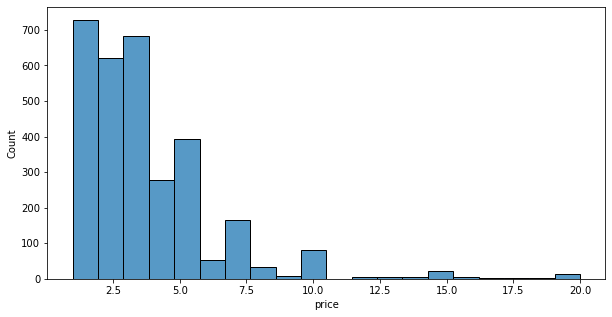

In [8]:
price_below_20 = df[(df['price'] > 0) & (df['price'] <20)]['price']
sns.histplot(price_below_20, bins =20)

<p><b>We can see most of apps are concentrated between 0 and 10</b></p>

<h3>Now, let's see how the apps are distributed with price and category</h3>

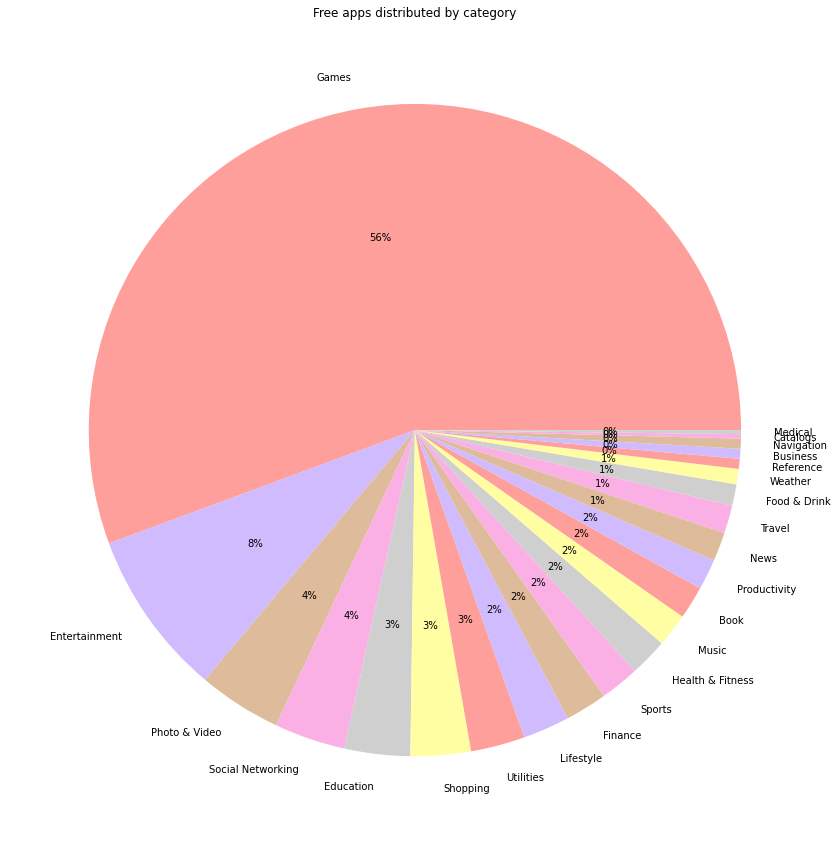

In [9]:
colors = sns.color_palette('pastel')[3:9]
plt.rcParams["figure.figsize"] = (15,15)
plt.pie(list(free_categ.values()), labels = list(free_categ.keys()), colors = colors, autopct='%.0f%%')
plt.title("Free apps distributed by category")
plt.show()

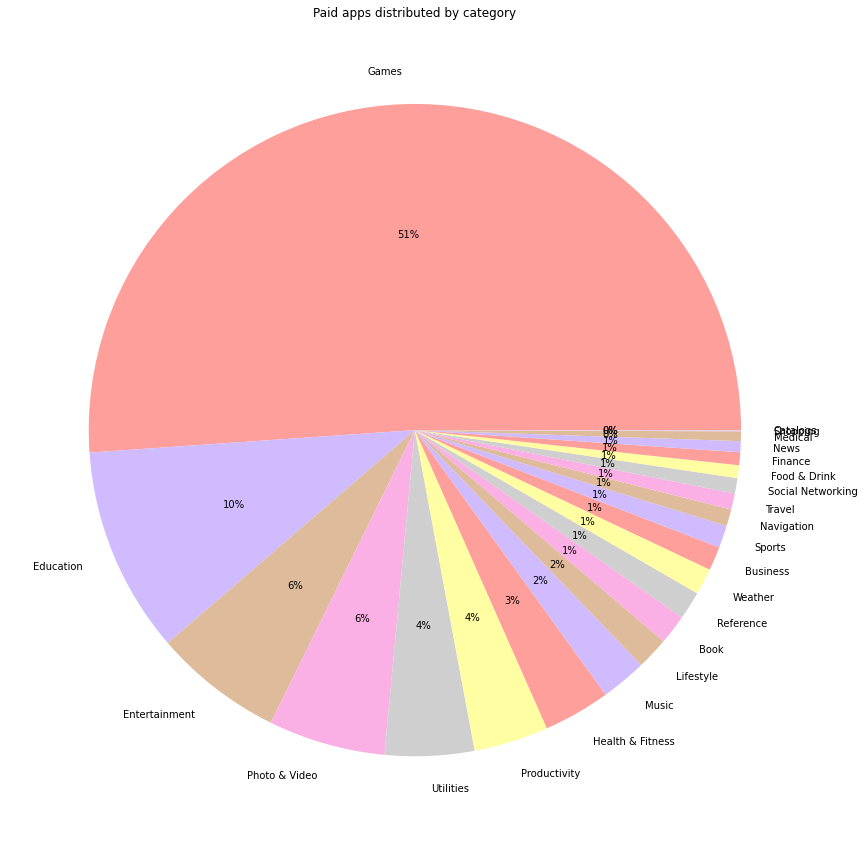

In [10]:
colors = sns.color_palette('pastel')[3:9]
plt.rcParams["figure.figsize"] = (15,15)
plt.pie(list(paid_categ.values()), labels = list(paid_categ.keys()), colors = colors, autopct='%.0f%%')
plt.title("Paid apps distributed by category")
plt.show()

<h3>Now, let's see what type of categories are more paid than free or more free than paid</h3>

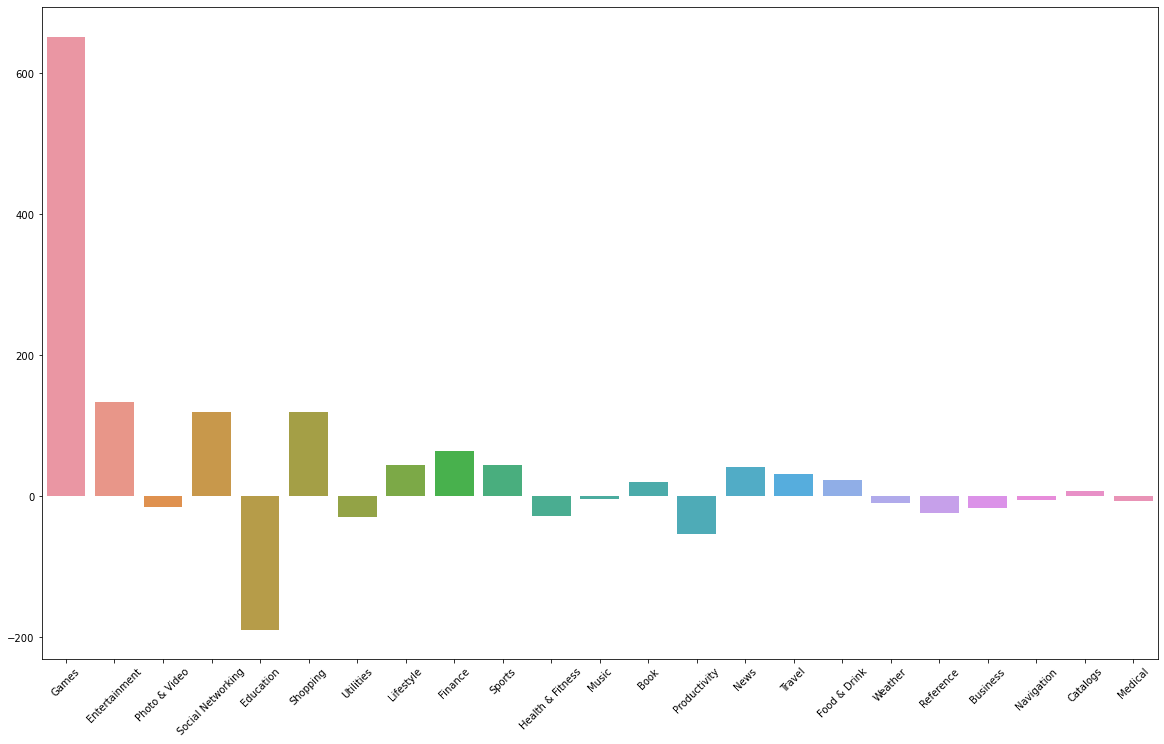

In [11]:
difference = {}
for x in free_categ:
    difference[x] = int(free_categ[x] - paid_categ[x])

plt.rcParams["figure.figsize"] = (20, 12)
plt.xticks(rotation = 45)
sns.barplot(x=list(difference.keys()),y =list(difference.values()))

<p>From the above plot we can see that Education, Health and Productivity apps are the ones with more paid apps than free apps. On the other hand we can also see that Games, Photo and Shopping apps are more freely avaiable</p>

<p><b>Let's also explore the ratio of free to paid apps so that we do not get ahead of ourselves. Difference itself will not be able to accurately paint a good picture.</b></p>

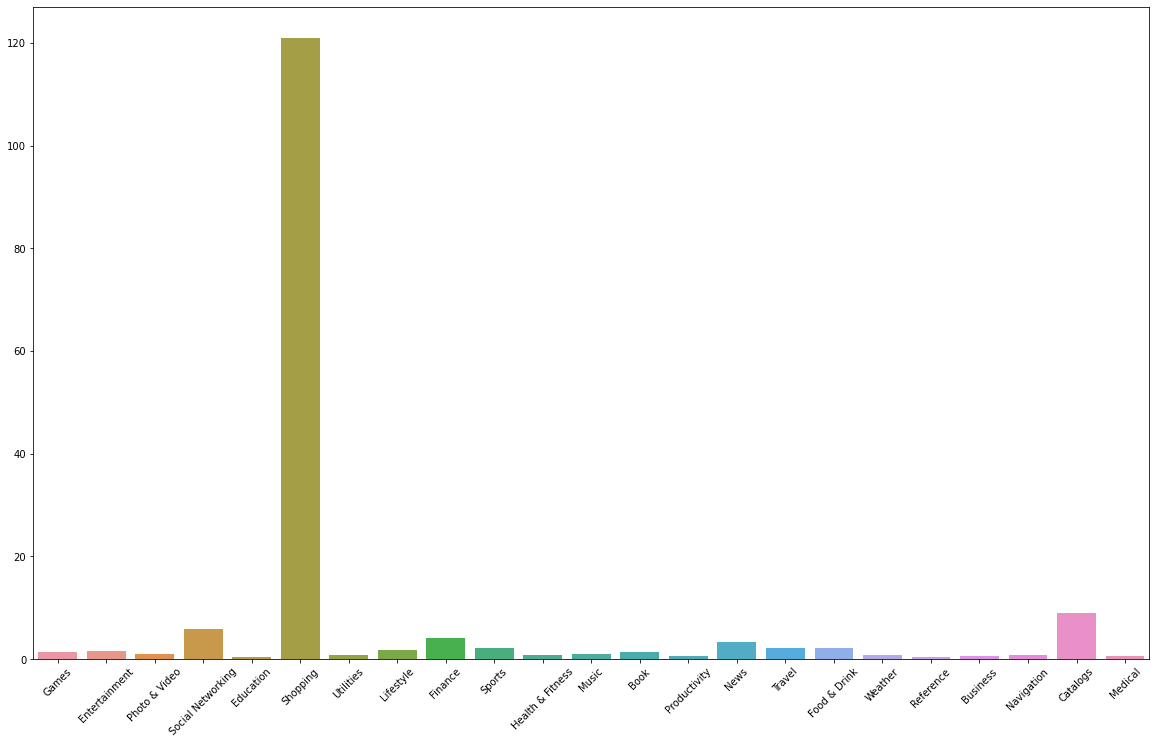

In [12]:
differenceTwo = {}
for x in free_categ:
    differenceTwo[x] = float(free_categ[x] / paid_categ[x])

plt.rcParams["figure.figsize"] = (20, 12)
plt.xticks(rotation = 45)
sns.barplot(x=list(differenceTwo.keys()),y =list(differenceTwo.values()))

<p>We can see that shopping and catalogs apps are more freely avaialable in the market place. Mostly because the users who spend time there will pay in the.</p>

<p><b>Let's plot the same graph without Shopping and Catalogs to see the ratio more in depth</b></p>

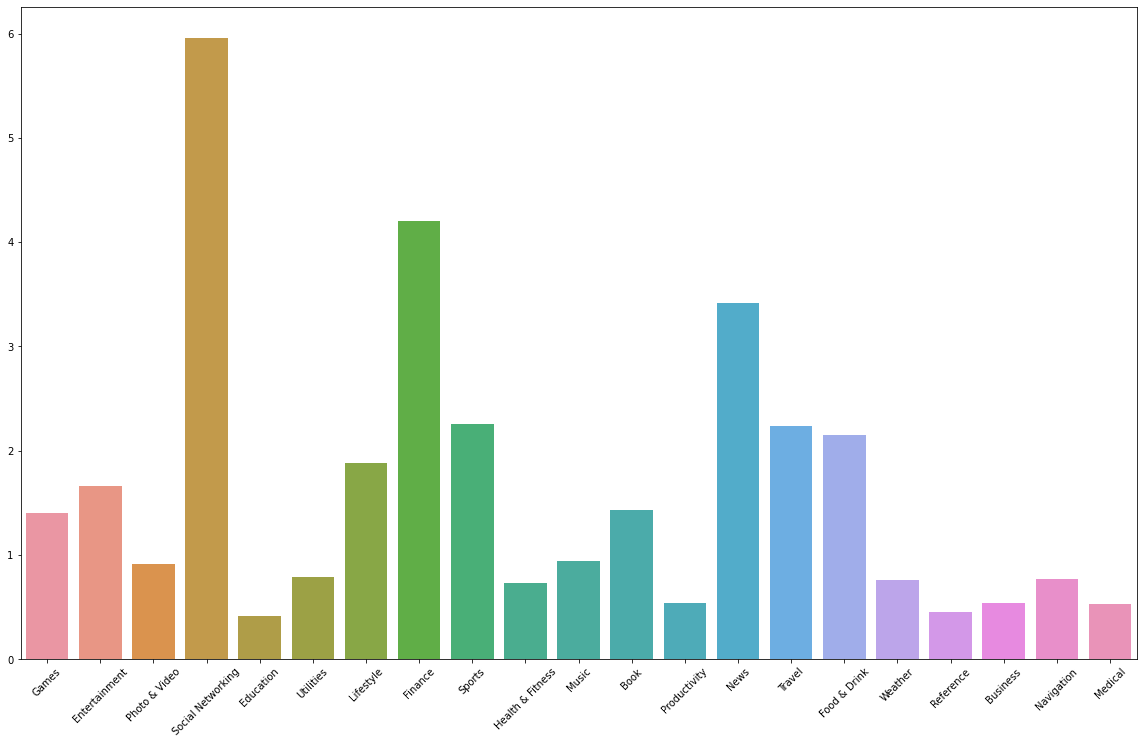

In [13]:
new_set = differenceTwo.copy()
new_set.pop("Shopping")
new_set.pop("Catalogs")

plt.rcParams["figure.figsize"] = (20, 12)
plt.xticks(rotation = 45)
sns.barplot(x=list(new_set.keys()),y =list(new_set.values()))

<h3>Let's see how the memory size of the application is distributed</h3>

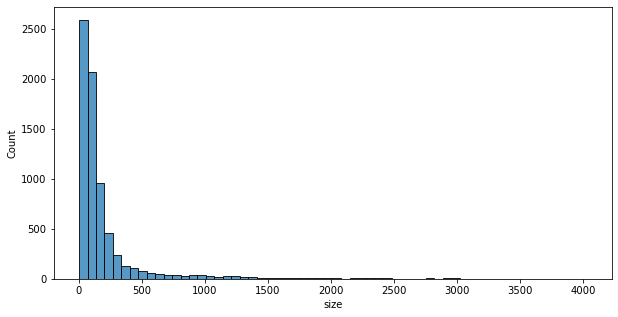

In [14]:
size_data = df['size'].apply(lambda x:float(x/1000000))
plt.rcParams["figure.figsize"] = (10,5)
sns.histplot(size_data, bins =60)
plt.show()

<p>We can see that most of the application are concentrated below 500MB</p>

<h3>Now let's see how the rating and the content rating are distributed</h3>
<p>First let's look at them individually and later we can look at them jointly</p>

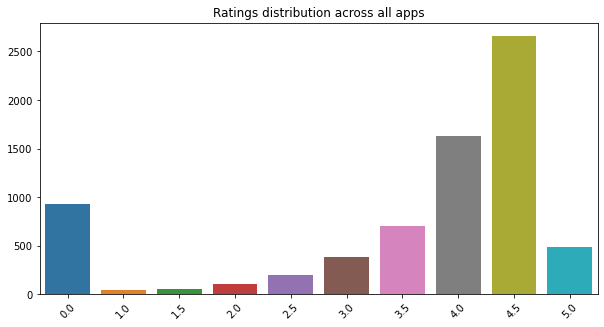

In [15]:
rating = df[['rating','content_rating']]

user_rating = rating['rating'].value_counts().to_dict()
content_rating = rating['content_rating'].value_counts().to_dict()

plt.rcParams["figure.figsize"] = (10, 5)
plt.xticks(rotation = 45)
plt.title("Ratings distribution across all apps")
sns.barplot(x=list(user_rating.keys()),y =list(user_rating.values()))

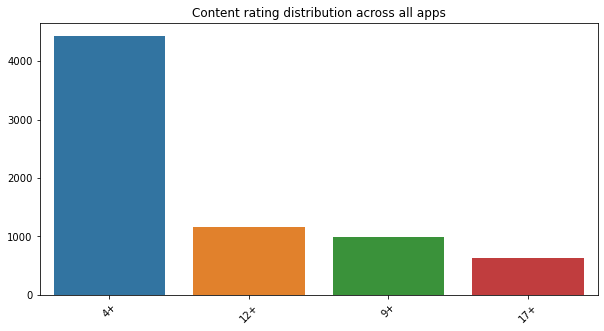

In [16]:
plt.rcParams["figure.figsize"] = (10, 5)
plt.xticks(rotation = 45)
plt.title("Content rating distribution across all apps")
sns.barplot(x=list(content_rating.keys()),y =list(content_rating.values()))

<p>From th above two plots we can figure out that most of the applications are for everyone and the ratings grew monotonically till 4.5</p>

<p><b>Now let's try to infer or extrapolate anything by poltting their joint distribution</b><p>

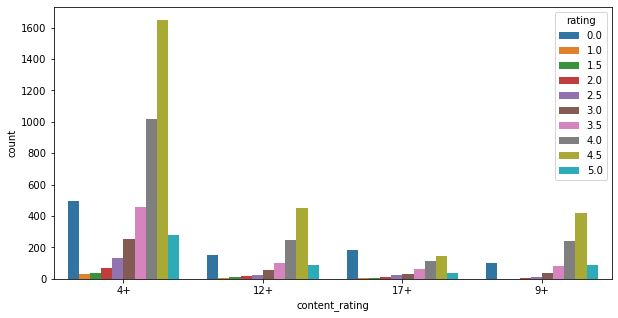

In [17]:
sns.countplot(x = "content_rating", hue = "rating", data = rating)

<p><b>We can see that amongst all age groups the ratings are almost evenly distributed, but the scale is different</b><p>